# APIs


## Tasks Today:
1) <b>Requests and the pokemon API </b> <br>
 

# working with APis

<p> What exactly is an API? <br> <br>
API is the acronym for Application Programming Interface, which is a software intermediary that allows two applications to talk to each other. Each time you use an app like Facebook, send an instant message, or check the weather on your phone, you're using an API. </p>

### The Poke API  allows you to retreive a pokemon's information from PokeAPI https://pokeapi.co/



In [2]:
# making an API call
import requests


### Display a Pokemon's name, weight, abilities, and types

In [4]:
# get the name


In [5]:
# get types


In [6]:
# get weight


In [7]:
# get abilities


In [6]:
# Create a structure for a single pokemon


#### Create a function to Pull in your own Pokemon's data 

In [10]:
def poke_api_call(pokemon):
    pass

Choose your pokemon

In [ ]:
from random import randint
# Random number generated for each pokemon id
random_team = [randint(1,898) for i in range(6)]

your_team = ['electabuzz', 'haunter','tyranitar','blaziken','marowak','dragonair']


#### Use your function to create a dictionary of your Johto League 6  (favorite 6 pokemon)

In [11]:
# Place all 6 of your pokemon on the object below, each pokemon should have at least as much info as Pikachu did.
my_six_pokemon = {}


## Lets create a class called 'Pokemon' and create our pokemon as instances

In [13]:
class Pokemon():
    pass

### Let's Catch some Pokemon

In [14]:
pokedex = {}


## Exercise 1:

### Create a Method prints an image of your pokemon

<p>HINT: You may need another attribute as well to store your image url within. </p>

In [260]:
# Display an image in Jupyter notebook
from IPython.display import Image

#display(Image(self.pokemon_sprite, width = 300))


In [19]:
import requests
from IPython.display import Image

# recreate your pokemon class here
class Encounter_Pokemon():

    def __init__(self, name):
        self.name = name
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None

    def throw_pokeball(self):
        catch_attempt = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if catch_attempt.status_code == 200:
            print(f'You successfully caught {self.name}')
            data = catch_attempt.json()
            self.name = data["name"] # this will allow for passing in either a full name or an integer index during the prior API call
            self.weight = data["weight"]
            self.abilities = [this_ability["ability"]["name"] for this_ability in data["abilities"]]
            self.types = [this_type["type"]["name"] for this_type in data["types"]]
            self.image = data["sprites"]['front_default']
        else:
            print(f'Error, status code {catch_attempt.status_code}')
            
    def i_choose_you(self):
        display(Image(self.image, width = 100))

In [20]:
# intantiate
my_haunter = Encounter_Pokemon("haunter")
my_haunter.throw_pokeball()

Pokemon successfully caught


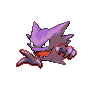

In [21]:
# Calling our new method
my_haunter.i_choose_you()

## Exercise 2:

### Create a Method that evolves your Pokemon
If your pokemon can't evolve any further print a message that says "\<name of pokemon> can't evolve."

In [22]:
import requests
from IPython.display import Image

# recreate your pokemon class here
class Encounter_Pokemon():

    def __init__(self, name):
        self.name = name
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.pokenum = None

    def throw_pokeball(self):
        catch_attempt = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if catch_attempt.status_code == 200:
            print(f'You successfully caught {self.name}')
            data = catch_attempt.json()
            self.name = data["name"] # this will allow for passing in either a full name or an integer index during the prior API call
            self.weight = data["weight"]
            self.abilities = [this_ability["ability"]["name"] for this_ability in data["abilities"]]
            self.types = [this_type["type"]["name"] for this_type in data["types"]]
            self.image = data["sprites"]['front_default']
            self.pokenum = data["id"]
        else:
            print(f'Error, status code {catch_attempt.status_code}')
        
    def successful_evolution(self):
        evo_attempt = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if evo_attempt.status_code == 200:
            print('Bum dum bum dum bum dum baaaa')
            data = evo_attempt.json()
            self.name = data["name"] # this will allow for passing in either a full name or an integer index during the prior API call
            self.weight = data["weight"]
            self.abilities = [this_ability["ability"]["name"] for this_ability in data["abilities"]]
            self.types = [this_type["type"]["name"] for this_type in data["types"]]
            self.image = data["sprites"]['front_default']
            self.pokenum = data["id"]
        else:
            print(f'Error on retrieving evolution info, status code {evo_attempt.status_code}')
            
    def i_choose_you(self):
        display(Image(self.image, width = 100))
        
    def wants_to_evolve(self):
        get_evo_data = requests.get(f'https://pokeapi.co/api/v2/pokemon-species/{self.pokenum}/')
        if get_evo_data.status_code == 200:
            print(f'{self.name} wants ...')
            tempData = get_evo_data.json()
            self.find_evo_data(tempData["evolution_chain"]["url"])
        else:
            print(f'Error on species page retrieval, status code {get_evo_data.status_code}')

    def find_evo_data(self, found_url):
        get_evo_data = requests.get(found_url)
        if get_evo_data.status_code == 200:
            print("...to evolve!")
            self.try_to_evolve(get_evo_data.json())
        else:
            print(f'Error on evo chain retrieval, status code {get_evo_data.status_code}')

    # I'm going to do the original max 2 evolutions. I know there are baby pokemon now, and super
    # evolutions, and so on, so I'm not sure what the maximum total possible evolutions are from
    # like baby to something special, probably 4? This is proof of concept anyway. Traversing
    # the chain 4 levels seems obnoxious. I'd love to hear the more pythony way to do this, though.
    # Should I be making a traverse_chain() method?
    def try_to_evolve(self, evo_data):
        # pokemon is bottom level, goes to next level if next level exists
        if self.name == evo_data["chain"]["species"]["name"]:
            # if next level exists:
            if evo_data["chain"]["evolves_to"]:
                self.oldName = self.name
                self.name = evo_data["chain"]["evolves_to"][0]["species"]["name"]
                self.successful_evolution()
                print(f'Congratulations, your {self.oldName} evolved into {self.name}')
            else:
                print(f"Sorry, your {self.name} can't evolve any further.")
        # pokemon is middle level, goes to next level if next level exists
        elif self.name == evo_data["chain"]["evolves_to"][0]["species"]["name"]:
            # if next level exists:
            if evo_data["chain"]["evolves_to"][0]["evolves_to"]:
                self.oldName = self.name
                self.name = evo_data["chain"]["evolves_to"][0]["evolves_to"][0]["species"]["name"]
                self.successful_evolution()
                print(f'Congratulations, your {self.oldName} evolved into {self.name}')
            else:
                print(f"Sorry, your {self.name} can't evolve any further.")
        # we'll assume there are at most three evolutions for now, I see we could go deeper, I'm
        # sure there's way more efficient code out there for doing all this
        else:
            print(f"Sorry, your {self.name} can't evolve any further.")
        

Now let's evolve a few

In [23]:
my_pokemon = Encounter_Pokemon('gastly')
my_pokemon.throw_pokeball()
print(my_pokemon.name)
print("pokemon num: ",my_pokemon.pokenum)
print("abilities: ",my_pokemon.abilities)
my_pokemon.wants_to_evolve()
print(my_pokemon.name)
print("pokemon num: ",my_pokemon.pokenum)
print("abilities: ",my_pokemon.abilities)
my_pokemon.wants_to_evolve()
print(my_pokemon.name)
print("pokemon num: ",my_pokemon.pokenum)
print("abilities: ",my_pokemon.abilities)
my_pokemon.wants_to_evolve()

my_pokemon = Encounter_Pokemon('moltres')
my_pokemon.throw_pokeball()
my_pokemon.wants_to_evolve()

Pokemon successfully caught
gastly
pokemon num:  92
abilities:  ['levitate']
gastly wants ...
...to evolve!
Bum dum bum dum bum dum baaaa
Congratulations, your gastly evolved into haunter
haunter
pokemon num:  93
abilities:  ['levitate']
haunter wants ...
...to evolve!
Bum dum bum dum bum dum baaaa
Congratulations, your haunter evolved into gengar
gengar
pokemon num:  94
abilities:  ['cursed-body']
gengar wants ...
...to evolve!
Sorry, your gengar can't evolve any further.
Pokemon successfully caught
moltres wants ...
...to evolve!
Sorry, your moltres can't evolve any further.


#  Final Exercise: <br> <br>Create a Move_Tutor Class that will allow the Pokemon Class to inherit a move list.
<br>
<p>for an added bonus you can make sure that if a pokemon has 4 moves the user can choose one of them to replace with a new move. </p>

In [31]:
import requests
from IPython.display import Image

class Move_Tutor:
    
    def __init__(self, move_list = []):
        self.move_list = move_list
        
    def learn_new_move(self):
        print(f'Moves that {self.name} knows:')
        print(self.move_list)
        new_move = input("Enter a move to learn: ")
        if new_move in self.move_list:
            self.already_knows_move(new_move)
        elif len(self.move_list) == 4:
            self.make_room_move(new_move)
        else:
            self.move_list.append(new_move)
    
    def already_knows_move(self, new_move):
        print(f'The move {new_move} is already known.')
        user_choice = input("Would you like to try to learn a different move? y/n: ").lower()
        if user_choice == "y":
            self.learn_new_move()
        else:
            print("Done learning moves.")
    
    def make_room_move(self, new_move):
        print(f"There are already 4 moves in {self.name}'s move list:'")
        print(self.move_list)
        user_choice = input(f"Would you like to forget a move to learn {new_move}? y/n").lower()
        if user_choice == "n":
            print("Done learning moves")
        else:
            user_choice = input(f"Which move would you like to forget?")
            if user_choice in self.move_list:
                self.move_list.remove(user_choice)
                self.move_list.append(new_move)
                print(f"Your pokemon {self.name} forgot {user_choice} and learned {new_move}!")
            else:
                print("That move isn't in the known list, did you type it correctly?")
                self.make_room_move(new_move)
        
# recreate your pokemon class here
class Encounter_Pokemon(Move_Tutor):

    def __init__(self, name, move_list):
        super().__init__(move_list)
        self.name = name
        self.abilities = []
        self.types = []
        self.weight = None
        self.image = None
        self.pokenum = None

    def throw_pokeball(self):
        catch_attempt = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if catch_attempt.status_code == 200:
            print(f'You successfully caught {self.name}')
            data = catch_attempt.json()
            self.name = data["name"] # this will allow for passing in either a full name or an integer index during the prior API call
            self.weight = data["weight"]
            self.abilities = [this_ability["ability"]["name"] for this_ability in data["abilities"]]
            self.types = [this_type["type"]["name"] for this_type in data["types"]]
            self.image = data["sprites"]['front_default']
            self.pokenum = data["id"]
        else:
            print(f'Error, status code {catch_attempt.status_code}')
        
    def successful_evolution(self):
        evo_attempt = requests.get(f'https://pokeapi.co/api/v2/pokemon/{self.name}')
        if evo_attempt.status_code == 200:
            print('Bum dum bum dum bum dum baaaa')
            data = evo_attempt.json()
            self.name = data["name"] # this will allow for passing in either a full name or an integer index during the prior API call
            self.weight = data["weight"]
            self.abilities = [this_ability["ability"]["name"] for this_ability in data["abilities"]]
            self.types = [this_type["type"]["name"] for this_type in data["types"]]
            self.image = data["sprites"]['front_default']
            self.pokenum = data["id"]
        else:
            print(f'Error on retrieving evolution info, status code {evo_attempt.status_code}')
            
    def i_choose_you(self):
        display(Image(self.image, width = 100))
        
    def wants_to_evolve(self):
        get_evo_data = requests.get(f'https://pokeapi.co/api/v2/pokemon-species/{self.pokenum}/')
        if get_evo_data.status_code == 200:
            print(f'{self.name} wants ...')
            tempData = get_evo_data.json()
            self.find_evo_data(tempData["evolution_chain"]["url"])
        else:
            print(f'Error on species page retrieval, status code {get_evo_data.status_code}')

    def find_evo_data(self, found_url):
        get_evo_data = requests.get(found_url)
        if get_evo_data.status_code == 200:
            print("...to evolve!")
            self.try_to_evolve(get_evo_data.json())
        else:
            print(f'Error on evo chain retrieval, status code {get_evo_data.status_code}')

    # I'm going to do the original max 2 evolutions. I know there are baby pokemon now, and super
    # evolutions, and so on, so I'm not sure what the maximum total possible evolutions are from
    # like baby to something special, probably 4? This is proof of concept anyway. Traversing
    # the chain 4 levels seems obnoxious. I'd love to hear the more pythony way to do this, though.
    # Should I be making a traverse_chain() method?
    def try_to_evolve(self, evo_data):
        # pokemon is bottom level, goes to next level if next level exists
        if self.name == evo_data["chain"]["species"]["name"]:
            # if next level exists:
            if evo_data["chain"]["evolves_to"]:
                self.oldName = self.name
                self.name = evo_data["chain"]["evolves_to"][0]["species"]["name"]
                self.successful_evolution()
                print(f'Congratulations, your {self.oldName} evolved into {self.name}')
            else:
                print(f"Sorry, your {self.name} can't evolve any further.")
        # pokemon is middle level, goes to next level if next level exists
        elif self.name == evo_data["chain"]["evolves_to"][0]["species"]["name"]:
            # if next level exists:
            if evo_data["chain"]["evolves_to"][0]["evolves_to"]:
                self.oldName = self.name
                self.name = evo_data["chain"]["evolves_to"][0]["evolves_to"][0]["species"]["name"]
                self.successful_evolution()
                print(f'Congratulations, your {self.oldName} evolved into {self.name}')
            else:
                print(f"Sorry, your {self.name} can't evolve any further.")
        # we'll assume there are at most three evolutions for now, I see we could go deeper, I'm
        # sure there's way more efficient code out there for doing all this
        else:
            print(f"Sorry, your {self.name} can't evolve any further.")

In [32]:
my_pokemon = Encounter_Pokemon('pikachu', ["scratch", "tackle", "thunderbolt"])
my_pokemon.throw_pokeball()
my_pokemon.learn_new_move()
my_pokemon.learn_new_move()


You successfully caught pikachu
Moves that pikachu knows:
['scratch', 'tackle', 'thunderbolt']
Enter a move to learn: tackle
The move tackle is already known.
Would you like to try to learn a different move? y/n: y
Moves that pikachu knows:
['scratch', 'tackle', 'thunderbolt']
Enter a move to learn: shock
Moves that pikachu knows:
['scratch', 'tackle', 'thunderbolt', 'shock']
Enter a move to learn: bolt
There are already 4 moves in pikachu's move list:'
['scratch', 'tackle', 'thunderbolt', 'shock']
Would you like to forget a move to learn bolt? y/ny
Which move would you like to forget?tackle
Your pokemon pikachu forgot tackle and learned bolt!


In [33]:
print(my_pokemon.move_list)

['scratch', 'thunderbolt', 'shock', 'bolt']
